<a href="https://colab.research.google.com/github/The-cheater/Deep_Learning_Models/blob/main/Cryptocurrency_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!pip install yfinance --quiet

import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler


In [11]:
# Download Bitcoin historical price
btc = yf.download('BTC-USD', start='2019-01-01', end='2024-12-31')
data = btc[['Close']].dropna().values
# Normalize prices
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Function to create sequences
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Sequence length (e.g., past 60 days)
window_size = 60
X, y = create_sequences(scaled_data, window_size)

# Reshape X for RNN input: (samples, time steps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))
# Train-test split (80-20)
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]
# Define RNN model
model = Sequential([
    SimpleRNN(100, return_sequences=False, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 100)            │        10,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,301 (40.24 KB)

 Trainable params: 10,301 (40.24 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0189 - val_loss: 0.0025
Epoch 2/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 3/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0011 - val_loss: 0.0049
Epoch 4/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 5/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.3199e-04 - val_loss: 7.2342e-04
Epoch 6/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.2723e-04 - val_loss: 5.1966e-04
Epoch 7/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.8479e-04 - val_loss: 5.8185e-04
Epoch 8/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.1449e-04 - val_loss: 8.1626e-04
Epoch 9/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5.2948e-04 - val_loss: 4.1751e-04
Epoch 10/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.4016e-04 - val_loss: 5.2454e-04
Epoch 11/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.5371e-04 - val_loss: 5.7544e-04
Epoch 12/20
54/5

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


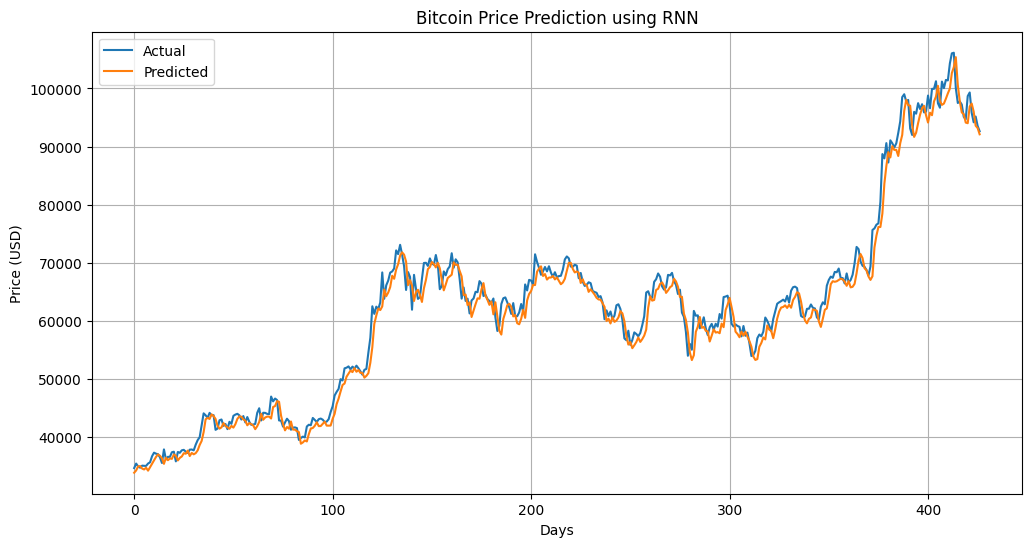

In [14]:
# Predict and inverse scale
predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted)
actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot predictions vs actual
plt.figure(figsize=(12,6))
plt.plot(actual, label='Actual')
plt.plot(predicted, label='Predicted')
plt.title('Bitcoin Price Prediction using RNN')
plt.xlabel('Days')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


In [15]:
#using better rnn model LSTM
!pip install yfinance --quiet

import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler


In [16]:
# Download Ethereum data
eth = yf.download('ETH-USD', start='2019-01-01', end='2024-12-31')
data = eth[['Close']].dropna().values  # Use only the closing price


[*********************100%***********************]  1 of 1 completed


In [17]:
# Scale data between 0 and 1
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Create sequences
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

window_size = 60
X, y = create_sequences(scaled_data, window_size)

# Reshape for LSTM input: (samples, time steps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))


In [18]:
# Split into 80% train and 20% test
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [19]:
# Build better LSTM model
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.3),
    LSTM(64, return_sequences=False),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,081 (461.25 KB)

 Trainable params: 118,081 (461.25 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
history = model.fit(X_train, y_train, epochs=40, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0011 - val_loss: 8.3695e-04
Epoch 2/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 3/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 9.7730e-04 - val_loss: 8.2477e-04
Epoch 4/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 5/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 9.7358e-04 - val_loss: 9.5142e-04
Epoch 6/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0010 - val_loss: 6.7505e-04
Epoch 7/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 9.9506e-04 - val_loss: 6.7022e-04
Epoch 8/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 9.2107e-04 - val_loss: 8.5340e-04
Epoch 9/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 9.7683e-04 - val_loss: 6.5038e-04
Epoch 10/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 7.9955e-04 - val_loss: 6.5591e-04
Epoch 11/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 8.4261e-04 - val_loss: 7.4517e-04

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


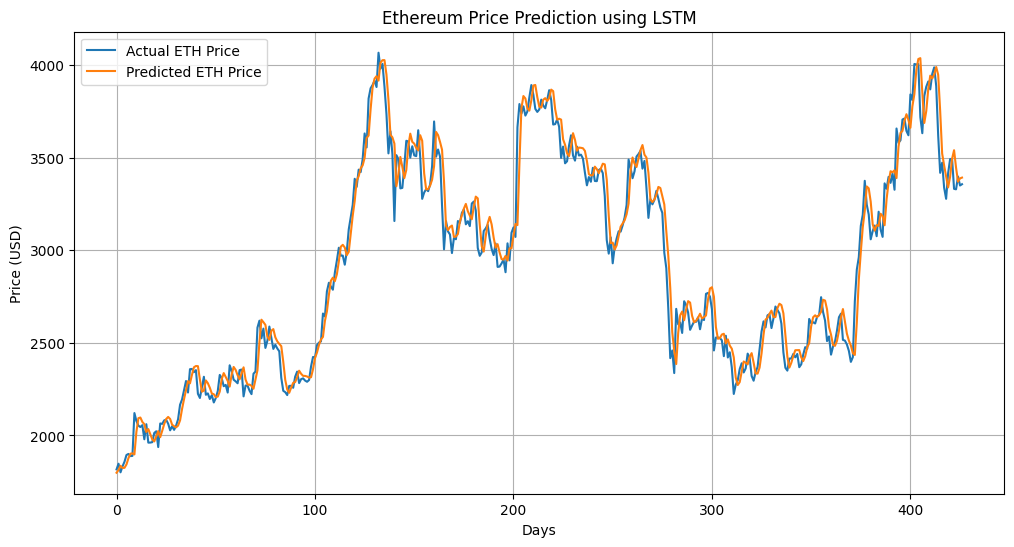

In [24]:
# Predict and scale back
predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted)
actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot actual vs predicted
plt.figure(figsize=(12,6))
plt.plot(actual, label='Actual ETH Price')
plt.plot(predicted, label='Predicted ETH Price')
plt.title('Ethereum Price Prediction using LSTM')
plt.xlabel('Days')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate metrics
mae = mean_absolute_error(actual, predicted)
mse = mean_squared_error(actual, predicted)
rmse = np.sqrt(mse)
r2 = r2_score(actual, predicted)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score (Accuracy Measure): {r2:.4f}")


Mean Absolute Error (MAE): 77.62
Mean Squared Error (MSE): 11800.05
Root Mean Squared Error (RMSE): 108.63
R² Score (Accuracy Measure): 0.9644
